In [9]:
import matplotlib.pyplot as plt
import json
import os

dirs = [
        'out/contrastive_experiments_holdout0/luke-base_contrastive-tmp-0.01_new-lr5e5_inprojnorm-plotnorm',
        # 'out/holdout-batch-0/luke-base_contrastive-tmp-0.01_new-lr5e5_inprojnorm-plotnorm-onlysup',
        # 'out/holdout-batch-0/luke-base_contrastive-tmp-0.01_new-lr5e5_inprojnorm-plotnorm-onlyunsup',
        'out/contrastive_experiments_holdout0/luke-base_contrastive-tmp-0.01_new-lr5e5_inprojnorm-plotraw',
        'out/contrastive_experiments_holdout0/luke-base_contrastive-tmp-0.01_new-lr5e5_inprojraw-plotraw',
        'out/contrastive_experiments_holdout0/luke-base_contrastive-tmp-0.01_new-lr5e5_inprojraw-plotnorm'
        ]

stats_dict = {}
for d in dirs:
    with open(os.path.join(d, 'stats', 'stats.json')) as f:
        tmp_stats = json.load(f)
        stats = {}
        for key in tmp_stats[0].keys():
            if isinstance(tmp_stats[0][key], dict):
                stats[key] = {}
                for k in tmp_stats[0][key].keys():
                    stats[key][k] = [s[key][k] for s in tmp_stats]
            else:
                stats[key] = [s[key] for s in tmp_stats]
        stats_dict[d.split('/')[-1]] = stats

run_keys = stats_dict.keys()
stat_keys = stats_dict[list(stats_dict.keys())[0]].keys()
print(run_keys)
print(stat_keys)

dict_keys(['luke-base_contrastive-tmp-0.01_new-lr5e5_inprojnorm-plotnorm', 'luke-base_contrastive-tmp-0.01_new-lr5e5_inprojnorm-plotraw', 'luke-base_contrastive-tmp-0.01_new-lr5e5_inprojraw-plotraw', 'luke-base_contrastive-tmp-0.01_new-lr5e5_inprojraw-plotnorm'])
dict_keys(['pos_neg_sim', 'holdout_cand_ratio', 'holdout_cand_count', 'holdout_count', 'ratio_all_cand_holdout', 'neg_cand_ratio', 'neg_cand_count', 'neg_count', 'ratio_all_cand_neg', 'per_class_retain', 'losses', 'epoch'])


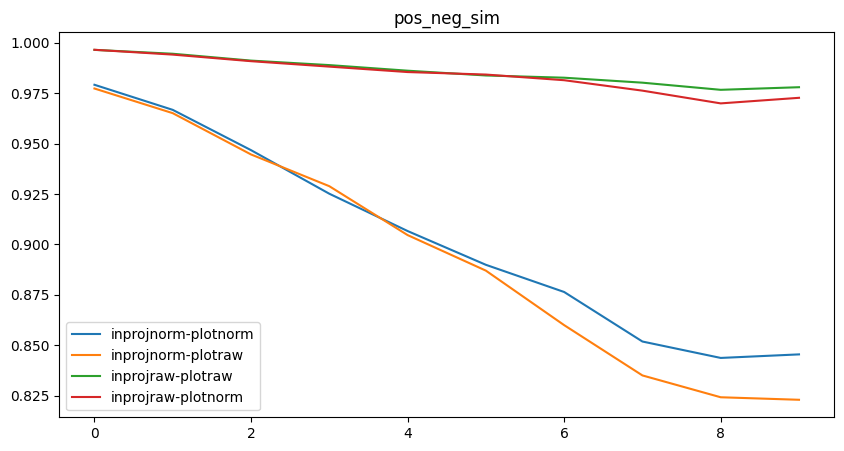

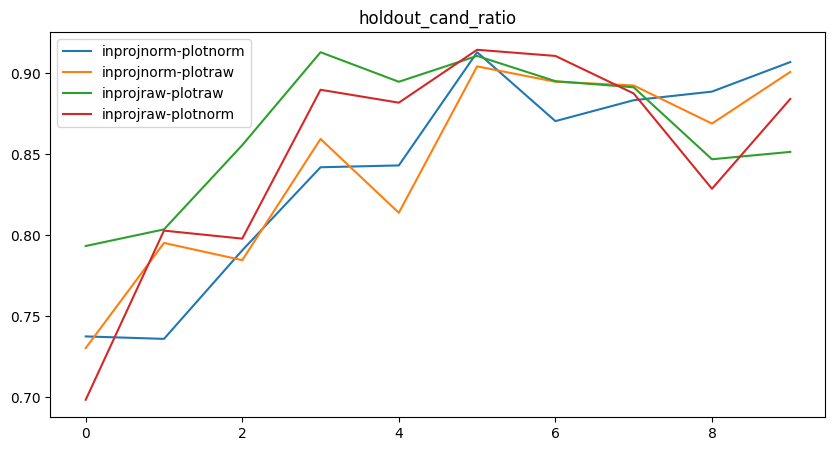

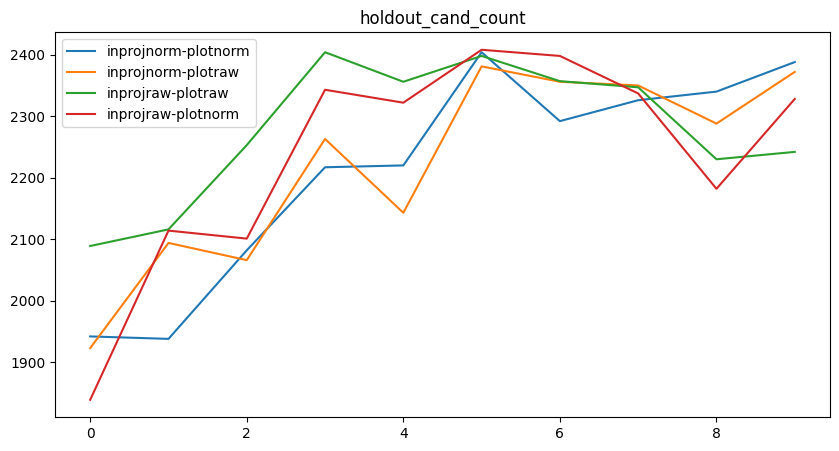

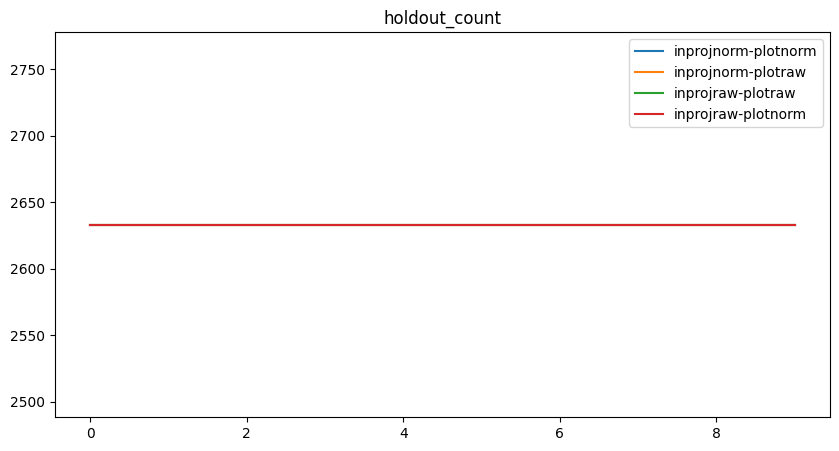

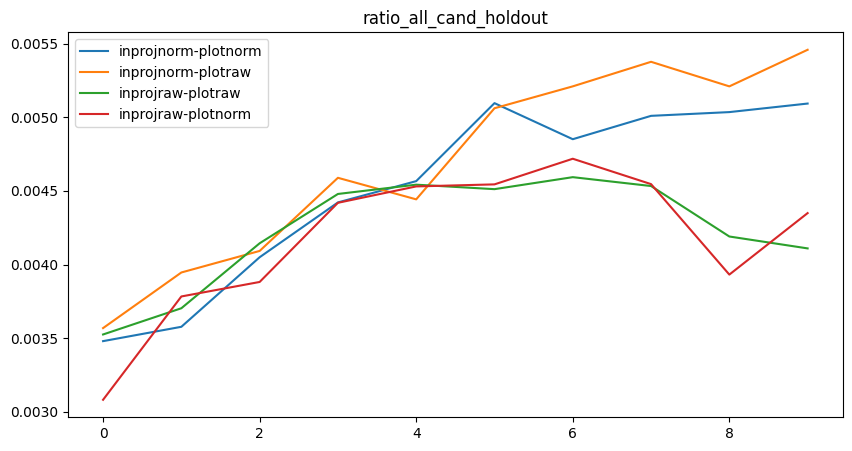

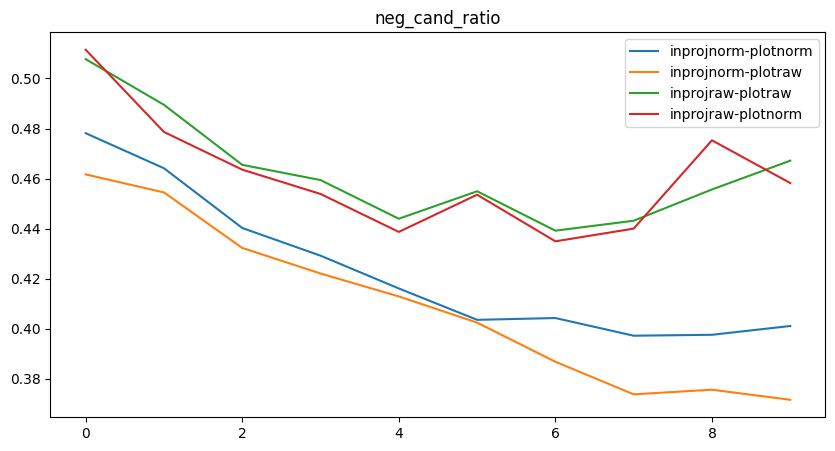

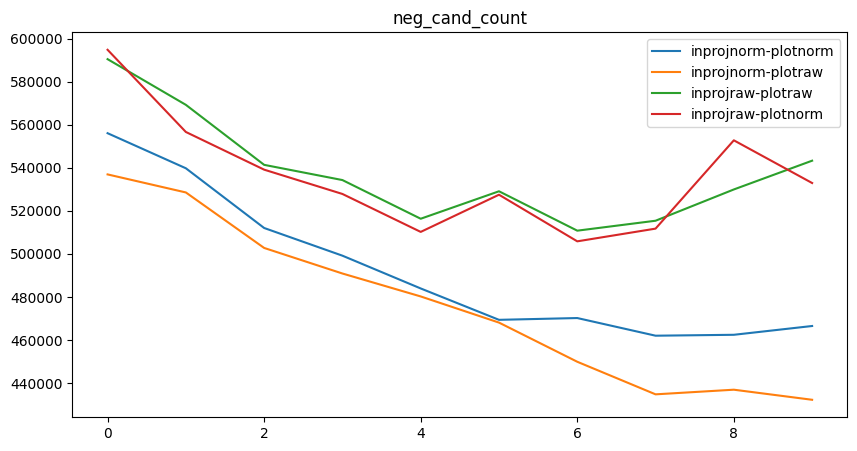

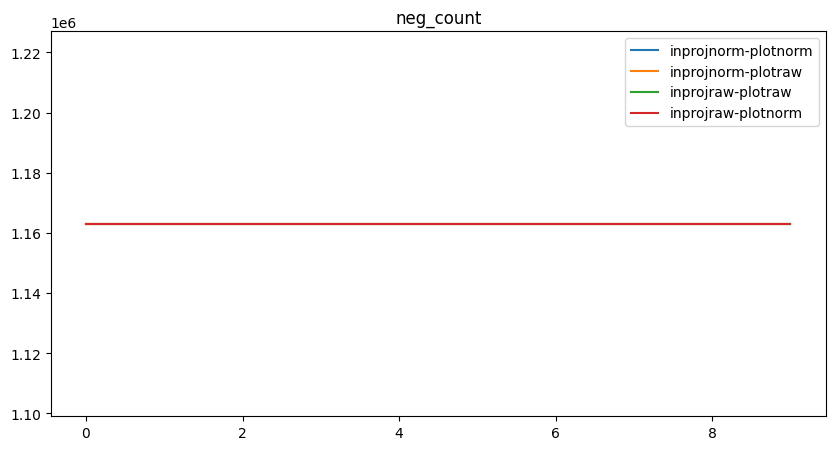

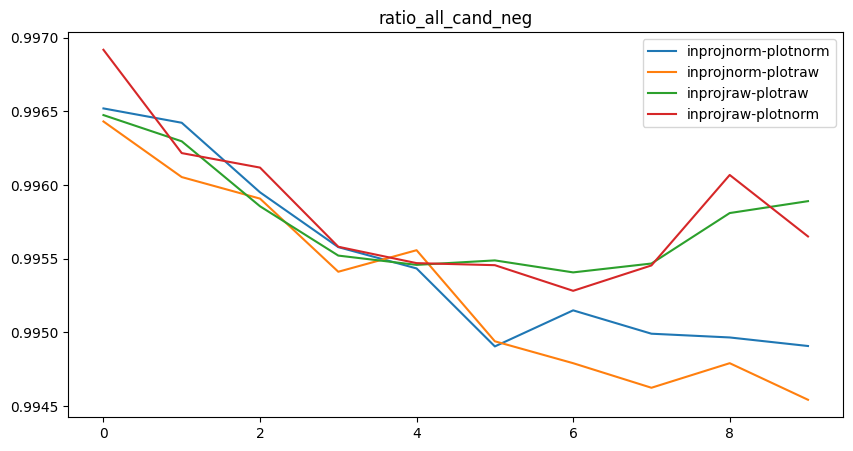

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


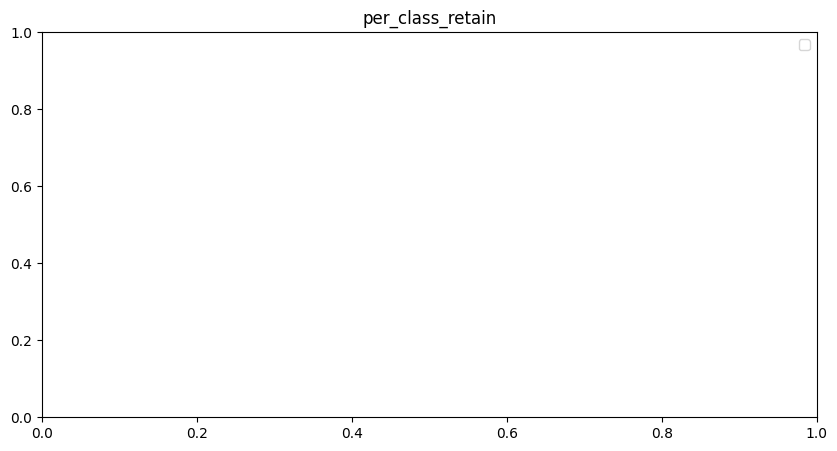

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


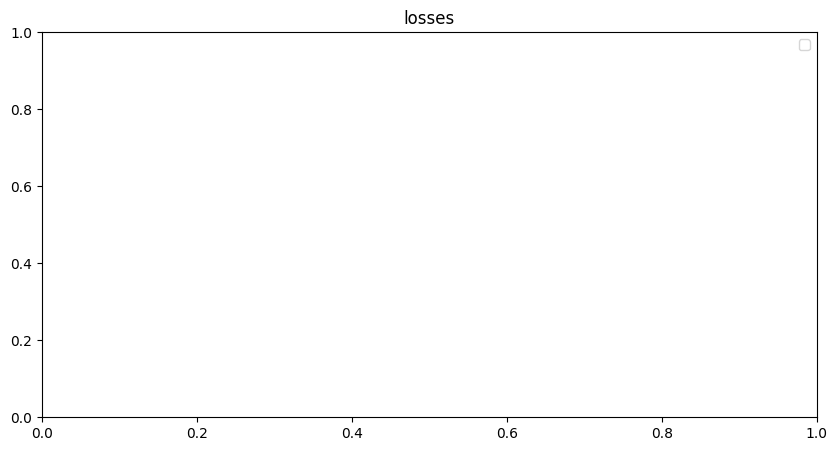

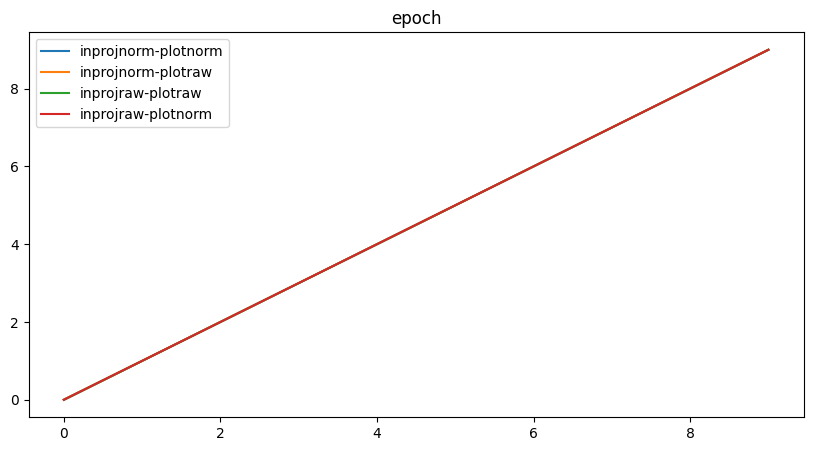

In [10]:
"""
- training on normalized embeddings into projection head and then plotting with raw embeddings seems to perform better than plotting with normalized embeddings?
- raw embeddings in projection input seems to have a faster increase in performance but then performance begins to degrade
- Have to determine a stopping metric, how do we know when performance is degrading when we dont know the holdouts?
    - Maybe when negative candidate count begins to increase after decreasing?
    - Do losses have any insight? TODO: plot this
- normalized input to projection head seems to be the most stable outcome
"""

for stat in stat_keys:
    plt.figure(figsize=(10, 5))
    plt.title(stat)
    for k, v in stats_dict.items():
        if isinstance(v[stat], dict):
            continue
        plt.plot(v[stat], label=k.split('_')[-1])
    plt.legend()
    plt.show()